In [ ]:
import numpy as np
import pandas as pd 
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import  naive_bayes
from math import sqrt 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
from matplotlib import pyplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AML/train_data.csv')
df_test=pd.read_csv('/content/drive/MyDrive/AML/test_data.csv')

In [ ]:
print('training datasets : ',df['Label'].value_counts())
print('----------------------------------------')
print('testing datasets : ',df_test['Label'].value_counts()) 

training datasets :  1    215487
0     34043
Name: Label, dtype: int64
----------------------------------------
testing datasets :  1    140000
0     56965
Name: Label, dtype: int64


In [ ]:
np.isinf(df).values.sum()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
np.isinf(df).values.sum()
df.dropna(axis=0,inplace=True)
df.isnull().sum()
np.isinf(df_test).values.sum()
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
np.isinf(df_test).values.sum()
df_test.dropna(axis=0,inplace=True)
df_test.isnull().sum()

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd PSH Flags                  0
Bwd Header

In [ ]:
df.head(5)

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,110861755.0,26.0,26.0,616.0,768.0,297.0,0.0,23.692308,80.460060,384.0,0.0,29.538462,104.350655,12.484016,0.469053,2173760.0,4077410.2,10007500.0,1.0,110682172.0,4427287.0,5073190.0,10186860.0,1.0,110682226.0,4427289.0,5104590.5,10188237.0,1.0,0.0,784.0,0.234526,0.234526,0.0,384.0,26.132076,91.479300,8368.463000,0.0,0.0,1.0,0.0,1.0,26.634615,23.692308,29.538462,520.0,16329.0,245.0,23.0,20.0,198805.450,64223.340000,392446.0,179351.0,9863210.0,413171.800000,10007500.0,8632089.0,0.0,0
1,40335006.0,9.0,10.0,8.0,62.0,1.0,0.0,0.888889,0.333333,31.0,0.0,6.200000,13.070747,1.735465,0.471055,2240833.8,4264280.0,10018634.0,1.0,40335006.0,5041876.0,5390054.0,10108818.0,1.0,40244490.0,4471610.0,5302932.0,10108919.0,1.0,0.0,200.0,0.223131,0.247924,0.0,31.0,3.550000,9.400308,88.365790,0.0,0.0,1.0,0.0,1.0,3.736842,0.888889,6.200000,180.0,63979.0,31320.0,7.0,20.0,90226.500,43.554560,90287.0,90185.0,9993447.0,40495.754000,10018634.0,9933709.0,0.0,0
2,113244633.0,56.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.494505,2058993.4,3839703.2,9882838.0,0.0,113244633.0,2058993.4,3839703.2,9882838.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494505,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,-1.0,-1.0,0.0,0.0,248176.750,859690.560000,2978061.0,4.0,9188876.0,809901.700000,9882838.0,6781893.0,0.0,0
3,95628949.0,21.0,20.0,20.0,0.0,1.0,0.0,0.952381,0.218218,0.0,0.0,0.000000,0.000000,0.209142,0.428740,2390723.8,4244399.0,10016037.0,2.0,95628949.0,4781447.5,5009488.5,10030869.0,2.0,90261819.0,4750622.0,5144813.0,10031293.0,2.0,0.0,640.0,0.219599,0.209142,0.0,1.0,0.500000,0.506061,0.256098,0.0,0.0,1.0,0.0,0.0,0.512195,0.952381,0.000000,420.0,16209.0,237.0,19.0,20.0,14901.223,177.422360,15367.0,14798.0,10014184.0,5184.078000,10016037.0,10000366.0,0.0,0
4,95613243.0,21.0,20.0,20.0,0.0,1.0,0.0,0.952381,0.218218,0.0,0.0,0.000000,0.000000,0.209176,0.428811,2390331.0,4237871.5,10004365.0,1.0,95613243.0,4780662.0,5010160.0,10030836.0,2.0,90277591.0,4751452.0,5145711.5,10031022.0,1.0,0.0,640.0,0.219635,0.209176,0.0,1.0,0.500000,0.506061,0.256098,0.0,0.0,1.0,0.0,0.0,0.512195,0.952381,0.000000,420.0,16383.0,250.0,19.0,20.0,26508.334,17.902514,26534.0,26473.0,10004310.0,21.430119,10004365.0,10004289.0,0.0,0


In [ ]:
x = df.iloc[:, : -1] # Take the features, except the last column, which is the target 
y = df.iloc[:, -1]

# df_test_target=df_test.iloc[:,-1]
# df_test_train=df_test.iloc[:,:-1]

x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]

In [ ]:
x_train, x_val, y_train, y_val =model_selection.train_test_split(x,y, test_size=0.2, random_state=2021,shuffle=True)

AdaBoostClassifier

In [ ]:
param_grid = {'n_estimators': [50, 100, 150,200],
                  'learning_rate' : [0.001, 0.01, 0.1, 1],
                  "algorithm": ['SAMME', 'SAMME.R'],
                }
ab_rs=RandomizedSearchCV(AdaBoostClassifier(),param_grid,random_state = 2021,n_iter=10,refit=True,verbose = 3,n_jobs=-1,cv=5)

In [ ]:
ab_rs.fit(x_train,y_train)
print('best score:', ab_rs.best_score_)
print('best parameters: ', ab_rs.best_params_)
print('best estimator: ', ab_rs.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.8min finished


best score: 0.9991824738188999
best parameters:  {'n_estimators': 50, 'learning_rate': 1, 'algorithm': 'SAMME.R'}
best estimator:  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)


In [ ]:
predict_val=ab_rs.predict(x_val)
RMSE_AB_val = sqrt(mean_squared_error(y_val,predict_val))
print('RMSE for validation data in AdaBoostClassifier model: ', RMSE_AB_val)
print("confusion_matrix for validation data:\n", metrics.confusion_matrix(y_val, predict_val))
print("ROC_AUC_score for validation data:", metrics.roc_auc_score(y_val, predict_val))
print('precision and recall for validation data:', metrics.precision_score(y_val, predict_val), metrics.recall_score(y_val,predict_val))
print('f1 score for validation data: ',f1_score(y_val,predict_val))


RMSE for validation data in AdaBoostClassifier model:  0.02724493056743222
confusion_matrix for validation data:
 [[ 6753    20]
 [   17 43056]]
ROC_AUC_score for validation data: 0.9983262099867204
precision and recall for validation data: 0.9995357043365215 0.9996053211988949
f1 score for validation data:  0.9995705115555608


In [ ]:
predict_test=ab_rs.predict(x_test)
RMSE_AB_test = sqrt(mean_squared_error(y_test,predict_test))
print('RMSE for test data in AdaBoostClassifier model: ', RMSE_AB_test)
print("confusion_matrix for test data:\n", metrics.confusion_matrix(y_test,predict_test))
print("ROC_AUC_score for test data:", metrics.roc_auc_score(y_test,predict_test))
print('precision and recall for test data:', metrics.precision_score(y_test,predict_test), metrics.recall_score(y_test,predict_test))
print('f1 score for test data: ',f1_score(y_test,predict_test))

RMSE for test data in AdaBoostClassifier model:  0.108578098949402
confusion_matrix for test data:
 [[ 54122   2184]
 [    58 133810]]
ROC_AUC_score for test data: 0.9803893431880483
precision and recall for test data: 0.9839404679618219 0.9995667373830938
f1 score for test data:  0.9916920500107462


In [ ]:
ab =  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

In [ ]:
ab.fit(x, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.02000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.04000
Feature: 6, Score: 0.02000
Feature: 7, Score: 0.04000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.10000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.02000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.02000
Feature: 30, Score: 0.02000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.02000
Feature: 33, Score: 0.04000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

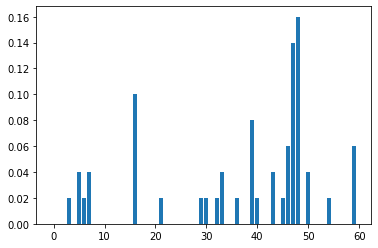

In [ ]:
importance = ab.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()